In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import joblib

In [7]:
df = pd.read_csv('Campaign_data.csv')
df

,ID,Active users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per active user,Events per session,Engagement rate,Event count,Key events,Session key event rate,Income
0,RFTAT,3,7,2,64.571429,0.666667,5.285714,0.285714,37,7,1.000000,0
1,011ZM,3,5,3,48.200000,1.000000,7.400000,0.600000,37,5,1.000000,0
2,W6VL5,3,11,2,10.909091,0.666667,3.363636,0.181818,37,11,1.000000,0
3,4OUCX,3,6,3,112.666667,1.000000,6.166667,0.500000,37,7,1.000000,0
4,MIYE2,3,3,3,39.666667,1.000000,12.333333,1.000000,37,3,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17555,2L9NY,48944,115854,55459,75.727243,1.133111,9.042631,0.478697,1047625,143527,0.998809,1
17556,U7MKM,7,7,3,2.714286,0.428571,3.428571,0.428571,24,7,1.000000,1
17557,6HHOA,7,8,1,1.375000,0.142857,3.000000,0.125000,24,8,1.000000,1
17558,22297,146,154,3,0.000000,0.020548,2.954545,0.019481,455,155,1.000000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   17560 non-null  object 
 1   Active users                         17560 non-null  int64  
 2   Sessions                             17560 non-null  int64  
 3   Engaged sessions                     17560 non-null  int64  
 4   Average engagement time per session  17560 non-null  float64
 5   Engaged sessions per active user     17560 non-null  float64
 6   Events per session                   17560 non-null  float64
 7   Engagement rate                      17560 non-null  float64
 8   Event count                          17560 non-null  int64  
 9   Key events                           17560 non-null  int64  
 10  Session key event rate               17560 non-null  float64
 11  Income                      

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

ID                                     0
Active users                           0
Sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per active user       0
Events per session                     0
Engagement rate                        0
Event count                            0
Key events                             0
Session key event rate                 0
Income                                 0
dtype: int64

In [8]:
df.describe()

,Active users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per active user,Events per session,Engagement rate,Event count,Key events,Session key event rate,Income
count,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,1.756000e+04,1.756000e+04,17560.000000,17560.000000
mean,381.881093,537.811959,252.543394,56.294963,0.924568,7.684130,0.492892,3.596728e+03,7.157279e+02,0.995714,0.495103
std,2434.370826,5809.107982,3730.952540,104.213481,3.516202,18.716751,0.312559,5.490589e+04,1.903429e+04,0.060702,0.499990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.000000,3.000000,1.000000,4.500000,0.333333,3.519278,0.267600,1.400000e+01,3.000000e+00,1.000000,0.000000
50%,16.000000,26.000000,12.000000,31.622804,0.683507,5.333333,0.509703,1.890000e+02,3.000000e+01,1.000000,0.000000
75%,133.000000,177.000000,74.000000,68.641867,1.000000,8.172823,0.695652,1.151250e+03,1.970000e+02,1.000000,1.000000
max,94101.000000,594395.000000,409261.000000,3712.000000,392.000000,1629.625000,1.000000,6.275630e+06,2.435656e+06,1.000000,1.000000


In [10]:
df.columns

Index(['ID', 'Active users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session',
       'Engaged sessions per active user', 'Events per session',
       'Engagement rate', 'Event count', 'Key events',
       'Session key event rate', 'Income'],
      dtype='object')

In [11]:
df.drop(['ID'],axis = 1 , inplace = True )

In [12]:
df.columns

Index(['Active users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session',
       'Engaged sessions per active user', 'Events per session',
       'Engagement rate', 'Event count', 'Key events',
       'Session key event rate', 'Income'],
      dtype='object')

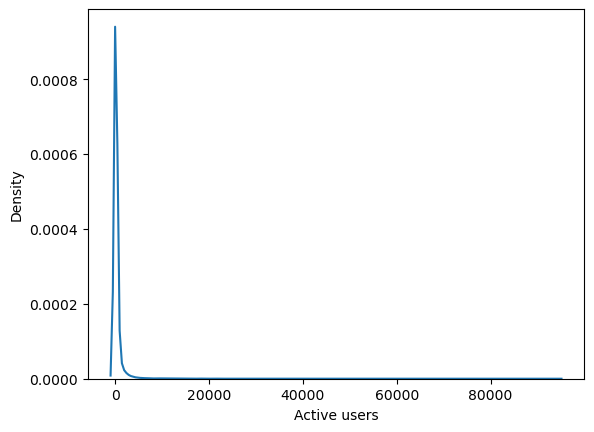

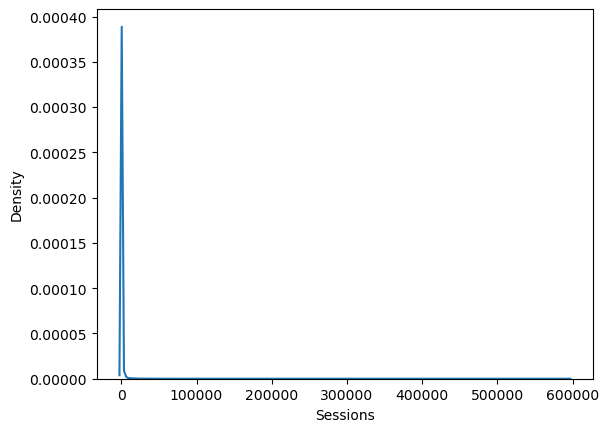

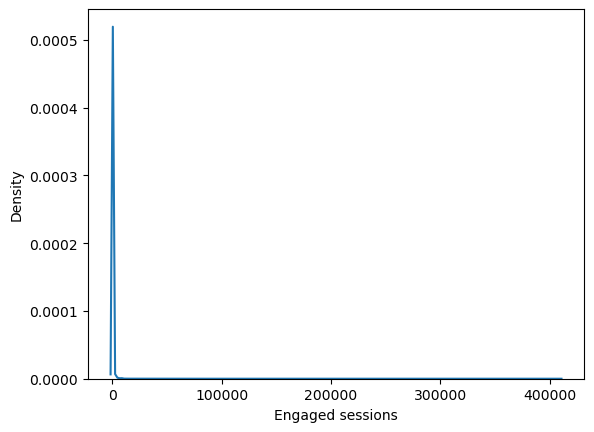

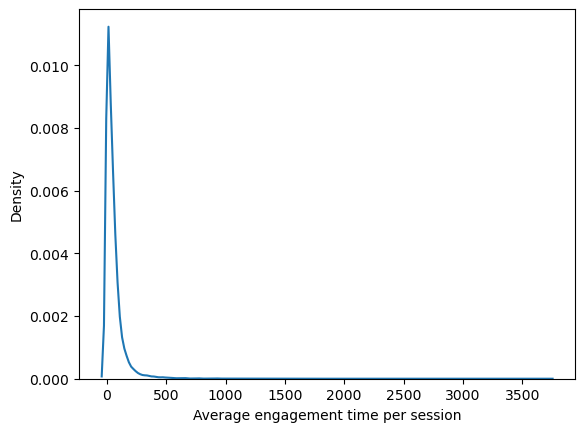

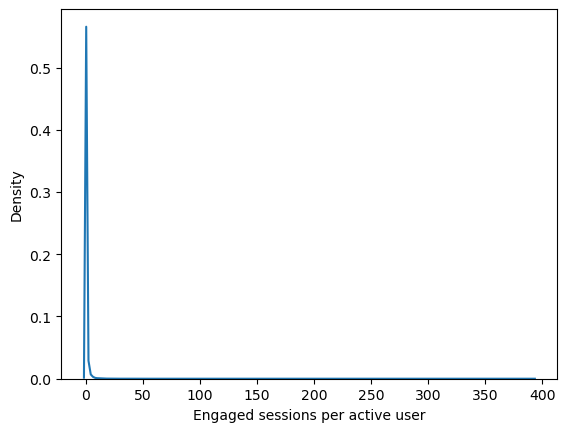

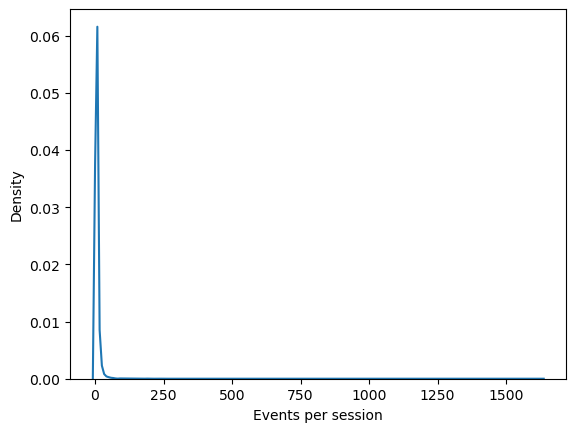

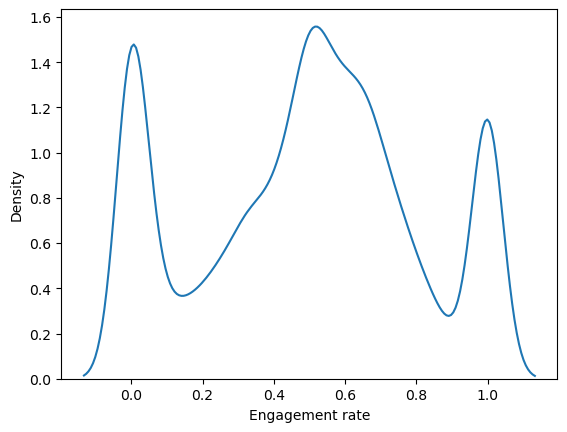

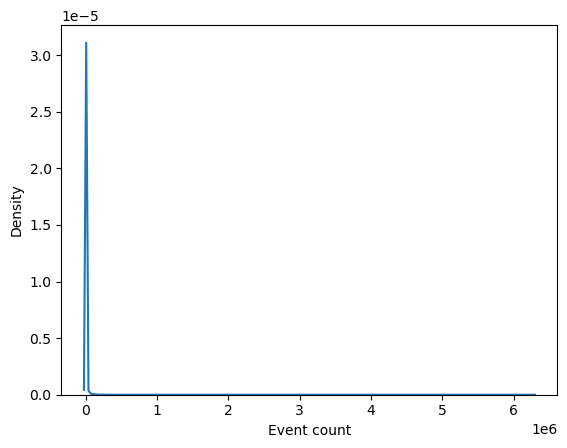

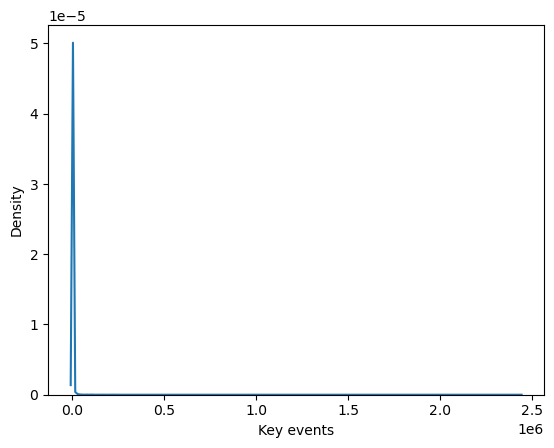

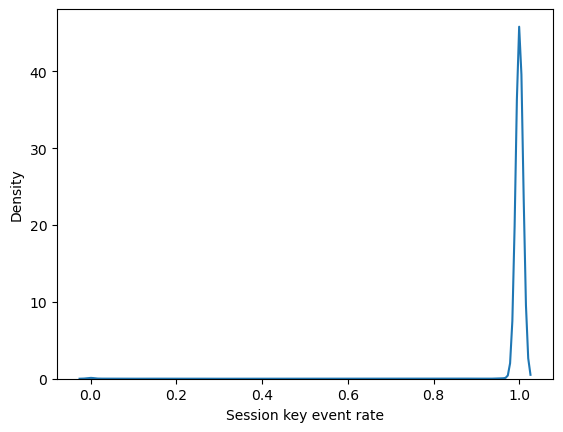

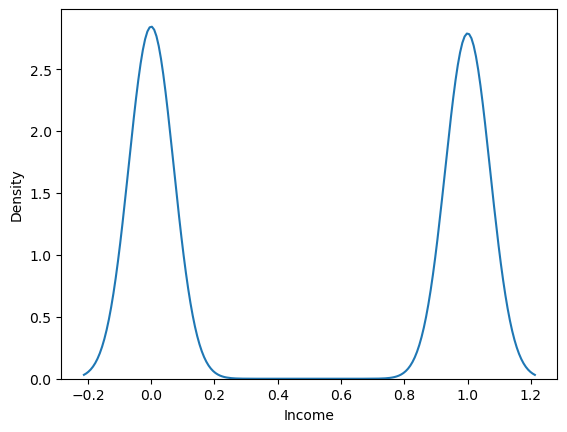

In [13]:
for col in df.columns :
    plt.figure()
    sns.kdeplot(x = df[col])

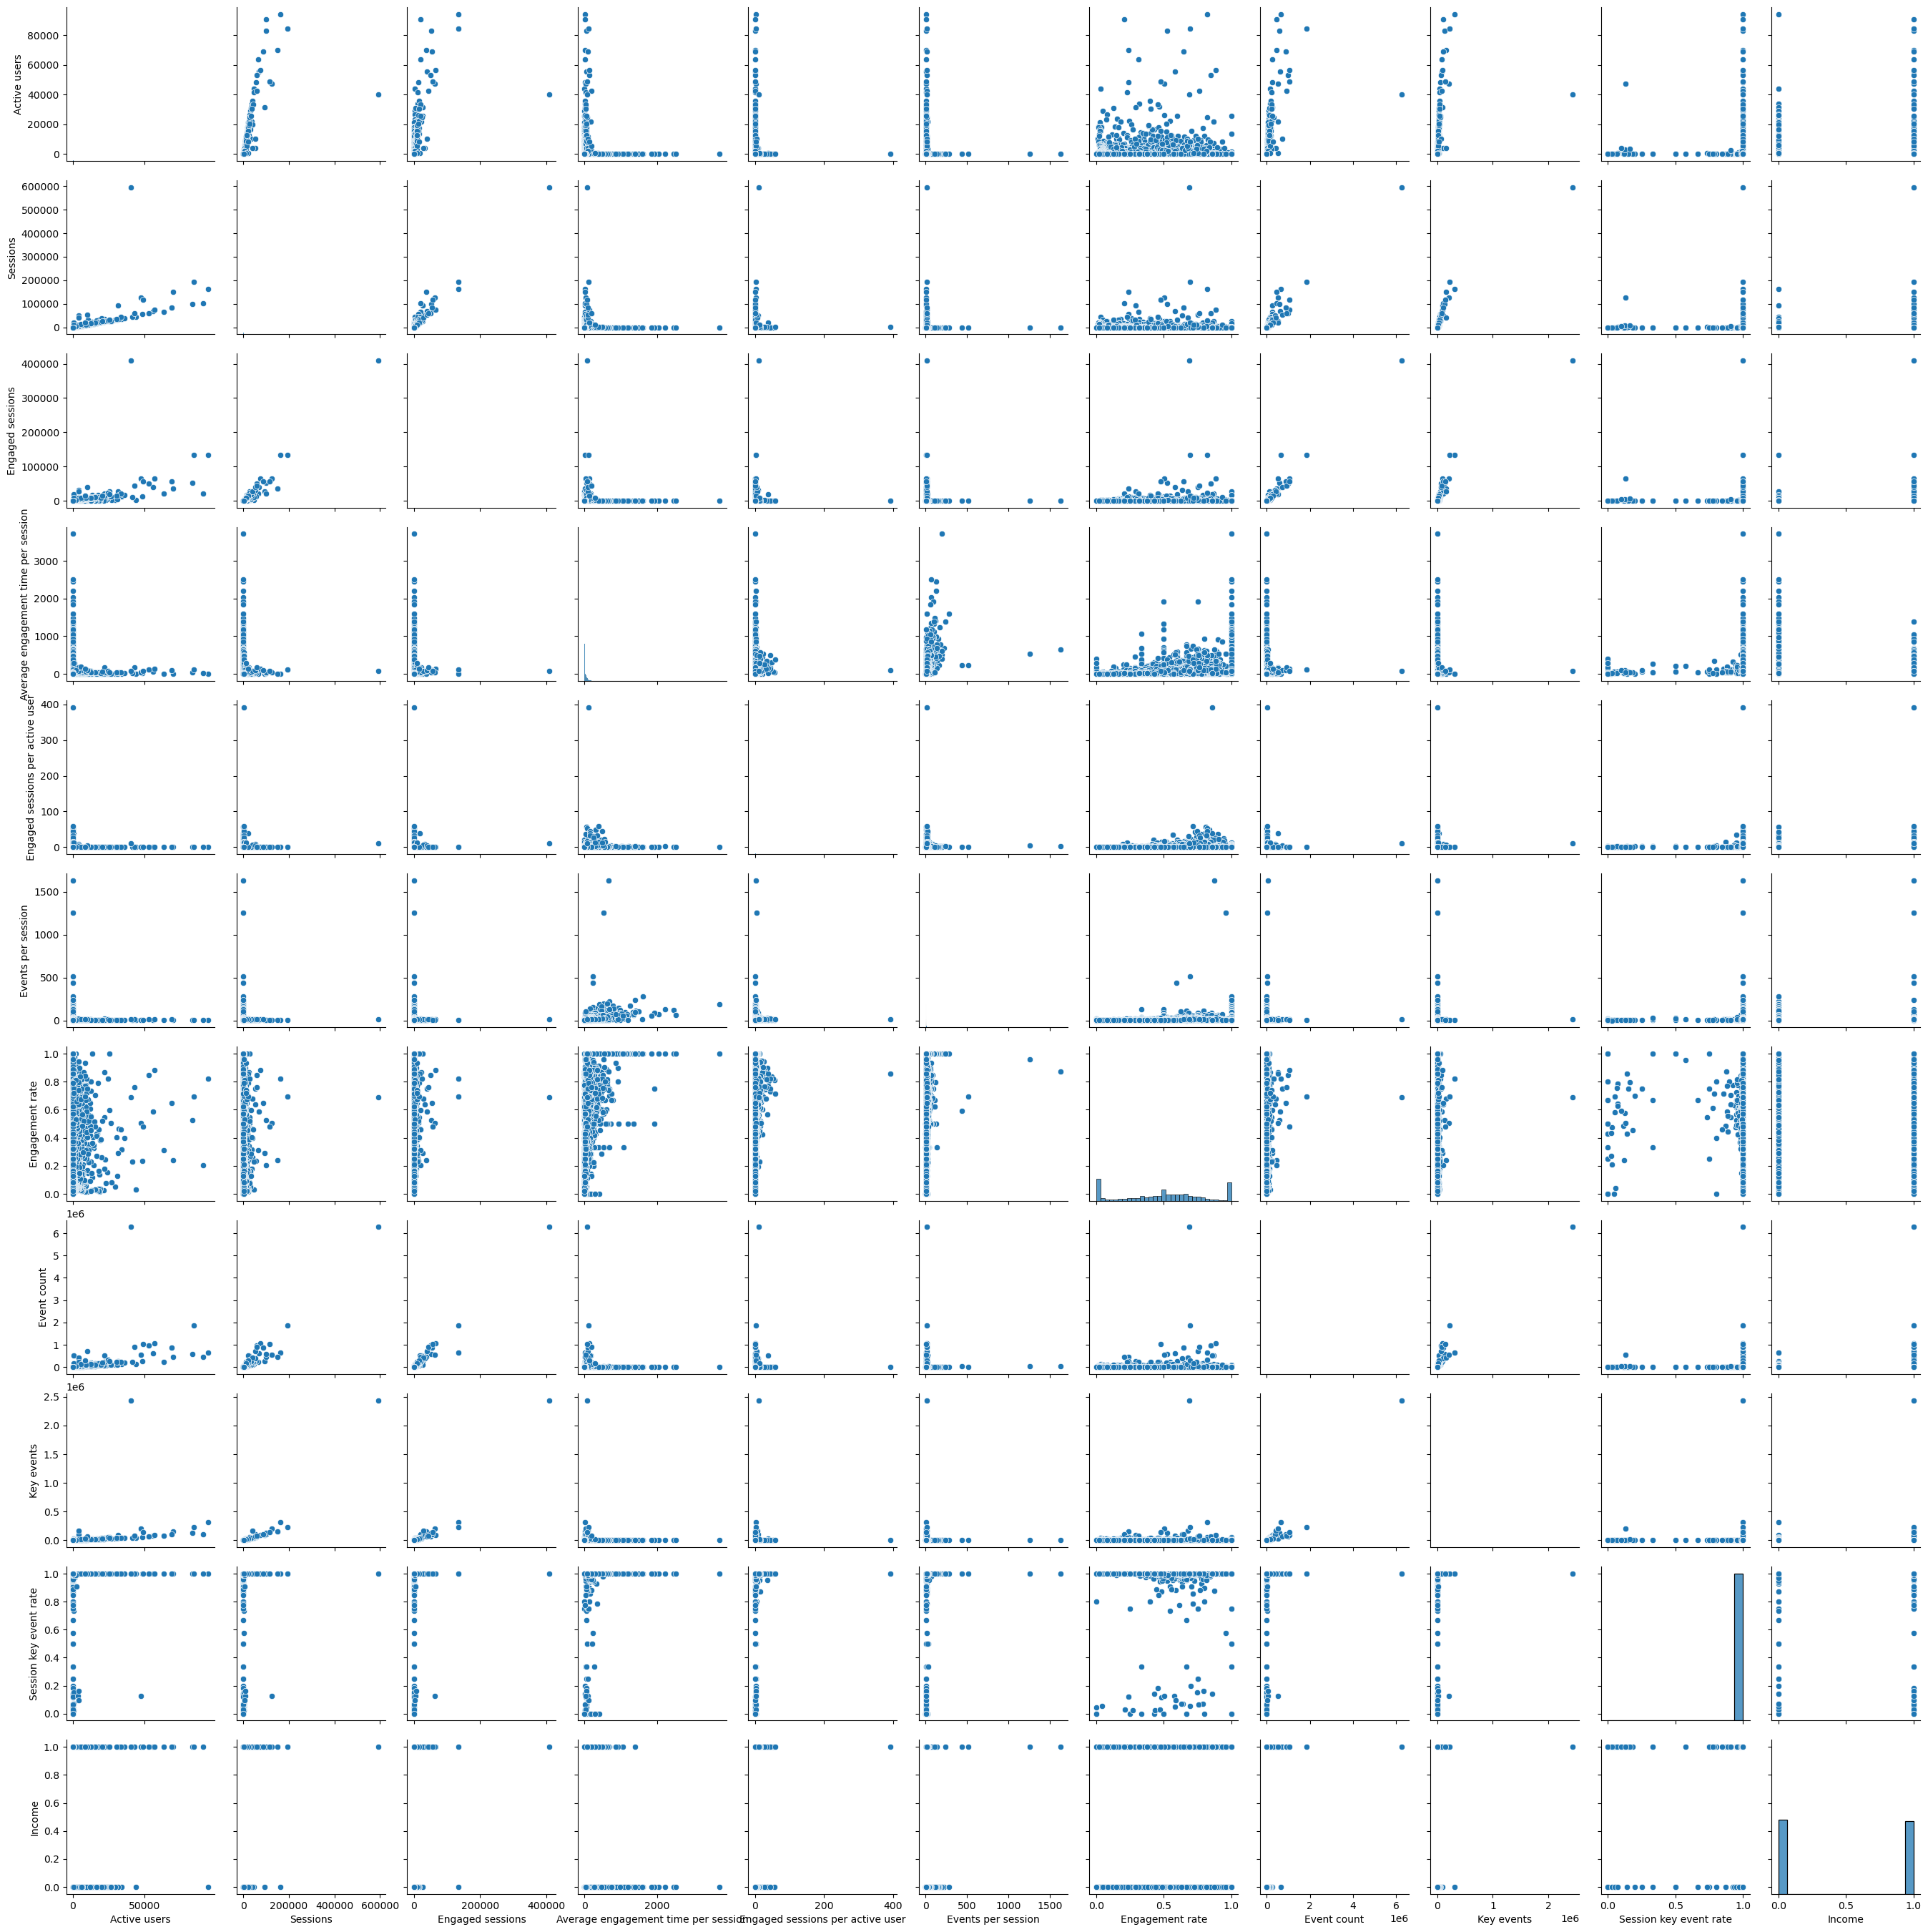

In [14]:
sns.pairplot(df.select_dtypes('number'))

<Axes: >

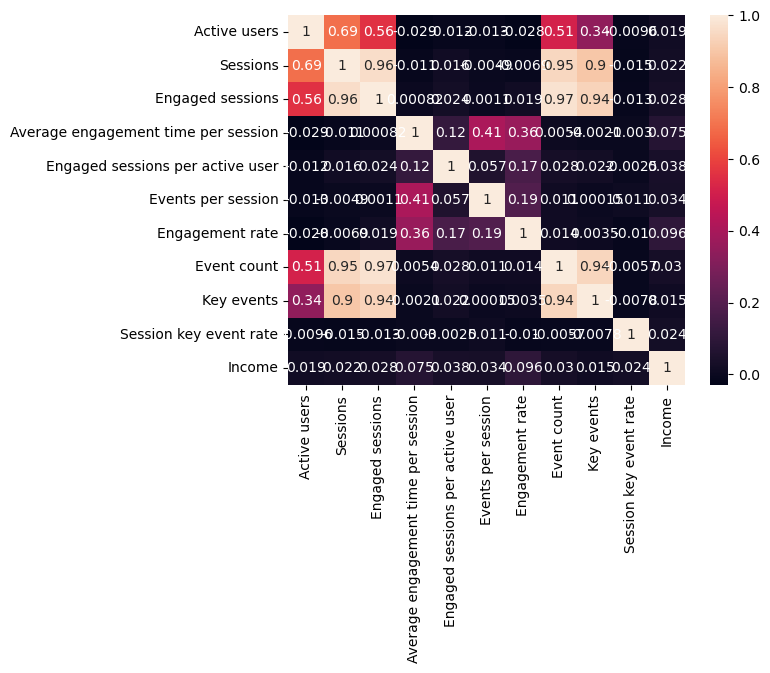

In [18]:
sns.heatmap(data = df.corr(), annot = True )